## Exercise 5.2

Write code to do the following:

1. Resample a signal at new rate $fs_{new}=20 kHz$ using MATLAB functions interp() and decimate().
2. Resample a signal at new rate $fs_{new}=20 kHz$ using MATLAB function resample().
3. Plot spectrogram of each signal after resampling.

NOTE:
sciPy has **resample()** and **decimate()** functions.
We also  define our own function **interp()** that works just like its MATLAB analog:
- insert zeros
- do LP-filtering

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def interp(x, n):
    if n == 1:
        return x
        
    # insert zeros after each n-th sample in x
    y = np.zeros(len(x) * n)
    y[::n] = x
    
    # design LP-filter and do the iterpolation filtering
    cutoff = 1.0 / n
    b = sig.firwin(90, cutoff)    
    b *= n
    y = sig.filtfilt(b, [1], y)
    
    return y


def gcd(a,b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


In [3]:
t = 0.6
fs = 16000
fs_new = 20000

sample_count = int(t * fs)
sample_count_new = int(t * fs_new)
plot_samples = 300

# amplitudes:
amps = [2, 3, 1]

# frequency components:
freqs = [900, 1400, 6100]

# initial signal (s1)
n = np.arange(sample_count)

# sum of all (three) sinusoids
s = sum([a * np.sin(2 * np.pi * n * f / fs) for f, a in zip(freqs, amps)])


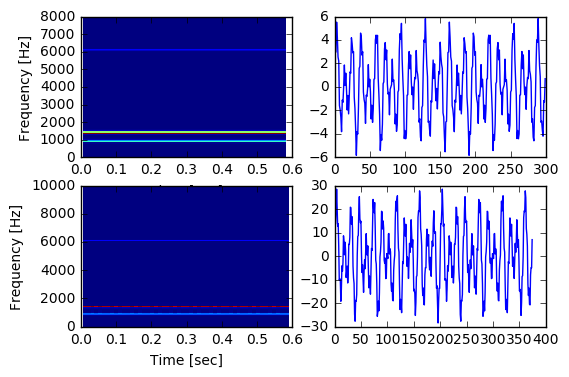

In [4]:
# ========================================
divisor = gcd(fs, fs_new)
y = interp(s, fs_new // divisor)
y = sig.decimate(y, fs // divisor, zero_phase=True)
# ========================================


plt.subplot(221)
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(222)
plt.plot(s[:plot_samples])

plt.subplot(223)
f, t, Sxx = sig.spectrogram(y, fs_new)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(224)
# multiply the number of plot_samples by fs_new / fs
plt.plot(y[:int(plot_samples * fs_new / fs)])


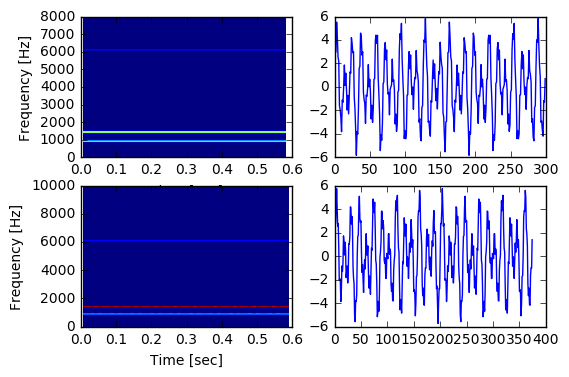

In [5]:
y = sig.resample(s, sample_count_new)


plt.subplot(221)
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(222)
plt.plot(s[:plot_samples])

plt.subplot(223)
f, t, Sxx = sig.spectrogram(y, fs_new)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(224)
# multiply the number of plot_samples by fs_new / fs
plt.plot(y[:int(plot_samples * fs_new / fs)])
